### Add link to data...

Import modules:

In [1]:
import lasio
from os import path
import numpy as np
import matplotlib.pylab as plt
import seaborn

Create an object with the path of the data folder:

In [6]:
DATAPATH = 'Data/NNS LAS'

Use Lasio to load a las file contained in the folder

In [7]:
las = lasio.read(path.join(DATAPATH, '02_05-10_DATACO_JWDL_QC.las'))

Header section Parameter regexp=~P was not found.


View the las header:

In [8]:
las.header

{'Curves': [CurveItem(mnemonic=DEPTH, unit=FT, value=, descr=Depth, original_mnemonic=DEPTH, data.shape=(16401,)),
  CurveItem(mnemonic=CALI, unit=IN, value=, descr=Caliper         Caliper, original_mnemonic=CALI, data.shape=(16401,)),
  CurveItem(mnemonic=DENC, unit=G/CC, value=, descr=Drho            Bulk Density Correction, original_mnemonic=DENC, data.shape=(16401,)),
  CurveItem(mnemonic=DENS, unit=G/CC, value=, descr=Density         Bulk Density, original_mnemonic=DENS, data.shape=(16401,)),
  CurveItem(mnemonic=DTC, unit=US/F, value=, descr=Sonic           Compressional Sonic, original_mnemonic=DTC, data.shape=(16401,)),
  CurveItem(mnemonic=GR, unit=GAPI, value=, descr=GammaRay        Gamma Ray, original_mnemonic=GR, data.shape=(16401,)),
  CurveItem(mnemonic=NEUT, unit=V/V, value=, descr=Neutron         Neutron Porosity, original_mnemonic=NEUT, data.shape=(16401,)),
  CurveItem(mnemonic=RDEP, unit=OHMM, value=, descr=DeepRes         Induction Resistivity Deep, original_mnemoni

Create a 'data' object containing the log data in a pandas dataframe

## Glob - glob.glob
from os import path
import glob

Iterate through the files to validate against a list of standard log names...

In [9]:
from os import path
import glob

for file in glob.glob(path.join(DATAPATH, '*.las')):
    print(file)

Data/NNS LAS\02_05-10_DATACO_JWDL_QC.las
Data/NNS LAS\02_10b-5_DATACO_JWDL_QC.las
Data/NNS LAS\02_15-2A_DATACO_JWDL_QC.las
Data/NNS LAS\02_20-1_DATACO_JWDL_QC.las
Data/NNS LAS\03_16-1_DATACO_JWDL_QC.las
Data/NNS LAS\03_21-1_DATACO_JWDL_QC.las
Data/NNS LAS\03_21-2_DATACO_JWDL_QC.las
Data/NNS LAS\03_28b-3_DATACO_JWDL_QC.las
Data/NNS LAS\08_15-1_DATACO_JWDL_QC.las
Data/NNS LAS\08_20-1_DATACO_JWDL_QC.las
Data/NNS LAS\08_30-1_DATACO_JWDL_QC.las
Data/NNS LAS\09_02-1_DATACO_JWDL_QC.las
Data/NNS LAS\09_02b-2_DATACO_JWDL_QC.las
Data/NNS LAS\09_02b-4Z_DATACO_JWDL_QC.las
Data/NNS LAS\09_02b-5_DATACO_JWDL_QC.las
Data/NNS LAS\09_03-4_DATACO_JWDL_QC.las
Data/NNS LAS\09_07-1_DATACO_JWDL_QC.las
Data/NNS LAS\09_11-2_DATACO_JWDL_QC.las
Data/NNS LAS\09_12b-4_DATACO_JWDL_QC.las
Data/NNS LAS\09_12b-7_DATACO_JWDL_QC.las
Data/NNS LAS\09_16-2_DATACO_JWDL_QC.las
Data/NNS LAS\09_16-3_DATACO_JDWL_QC.las
Data/NNS LAS\09_17a-3Z_DATACO_JWDL_QC.las
Data/NNS LAS\09_18b-7_DATACO_JWDL_QC.las
Data/NNS LAS\09_21-1_DATACO

In [10]:
data = las.df()
data.head()

,CALI,DENC,DENS,DTC,GR,NEUT,RDEP,RMIC,RSHAL,SP
DEPTH,,,,,,,,,,
550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


View the columns from the dataframe - one column per log.

In [11]:
print(data.columns)

Index(['CALI', 'DENC', 'DENS', 'DTC', 'GR', 'NEUT', 'RDEP', 'RMIC', 'RSHAL',
       'SP'],
      dtype='object')


Plot the Caliper and the Gamma Ray curves:

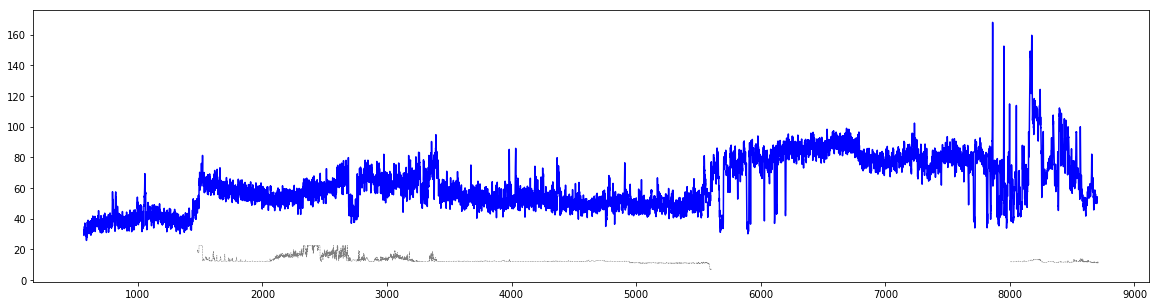

In [12]:
plt.figure(figsize=(20,5))
plt.plot(data['CALI'], '--k', linewidth=0.5, alpha = 0.5)
plt.plot(data['GR'], '-b')
plt.show()

Plot the Gamma Ray and Caliper curves on independent y axes.

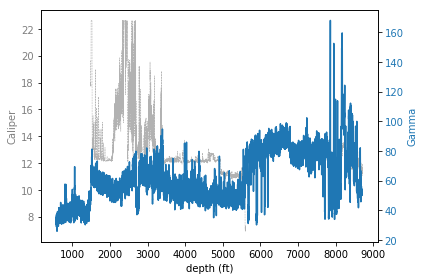

In [13]:
fig, ax1 = plt.subplots()
color = 'tab:grey'
ax1.set_xlabel('depth (ft)')
ax1.set_ylabel('Caliper', color=color)
ax1.plot(data['CALI'], '--k', linewidth=0.5, alpha = 0.3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Gamma', color=color)  # we already handled the x-label with ax1
ax2.plot(data['GR'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.figure(figsize=(20,5))
plt.show()

Create a histogram that shows the variation of GR readings from the average (median) reading calculated from the 5 readings above and 5 readings below.  This can help identify erroneous spikes in the data - these will show at the limits of the distribution.

## function that counts the percentage of points that are outside 10 standard deviation

- could rank the logs based on the number of points outside the 10 standard deviations.

In [22]:
def validate(data):
    for key, val in data.iteritems():
        med = data[key] - data[key].rolling(window=10, center=True).median()
        indx = ~np.isnan(med)
        print(key, np.std(med[indx]))
        
        
validate(data)

CALI 0.4441140994405291
DENC 0.018903002000408904
DENS 0.039852377786316624
DTC 3.870381277803718
GR 3.0890971401078193
NEUT 0.02787708743497679
RDEP 22.150216680038486
RMIC 33.510762421728835
RSHAL 12.779476677648631
SP 1.3160655223257467


count outliers from the above for each log...  more outliers, worse data...

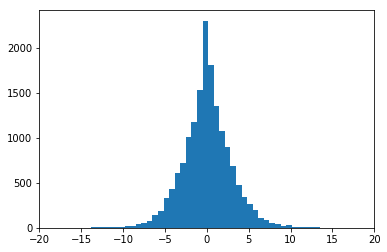

In [15]:
med = data['GR'] - data['GR'].rolling(window=10, center=True).median()
indx = ~np.isnan(med)
plt.hist(med[indx],100)
plt.xlim([-20,20])
plt.show()

Plot the original GR data and a 'de-spiked' version...

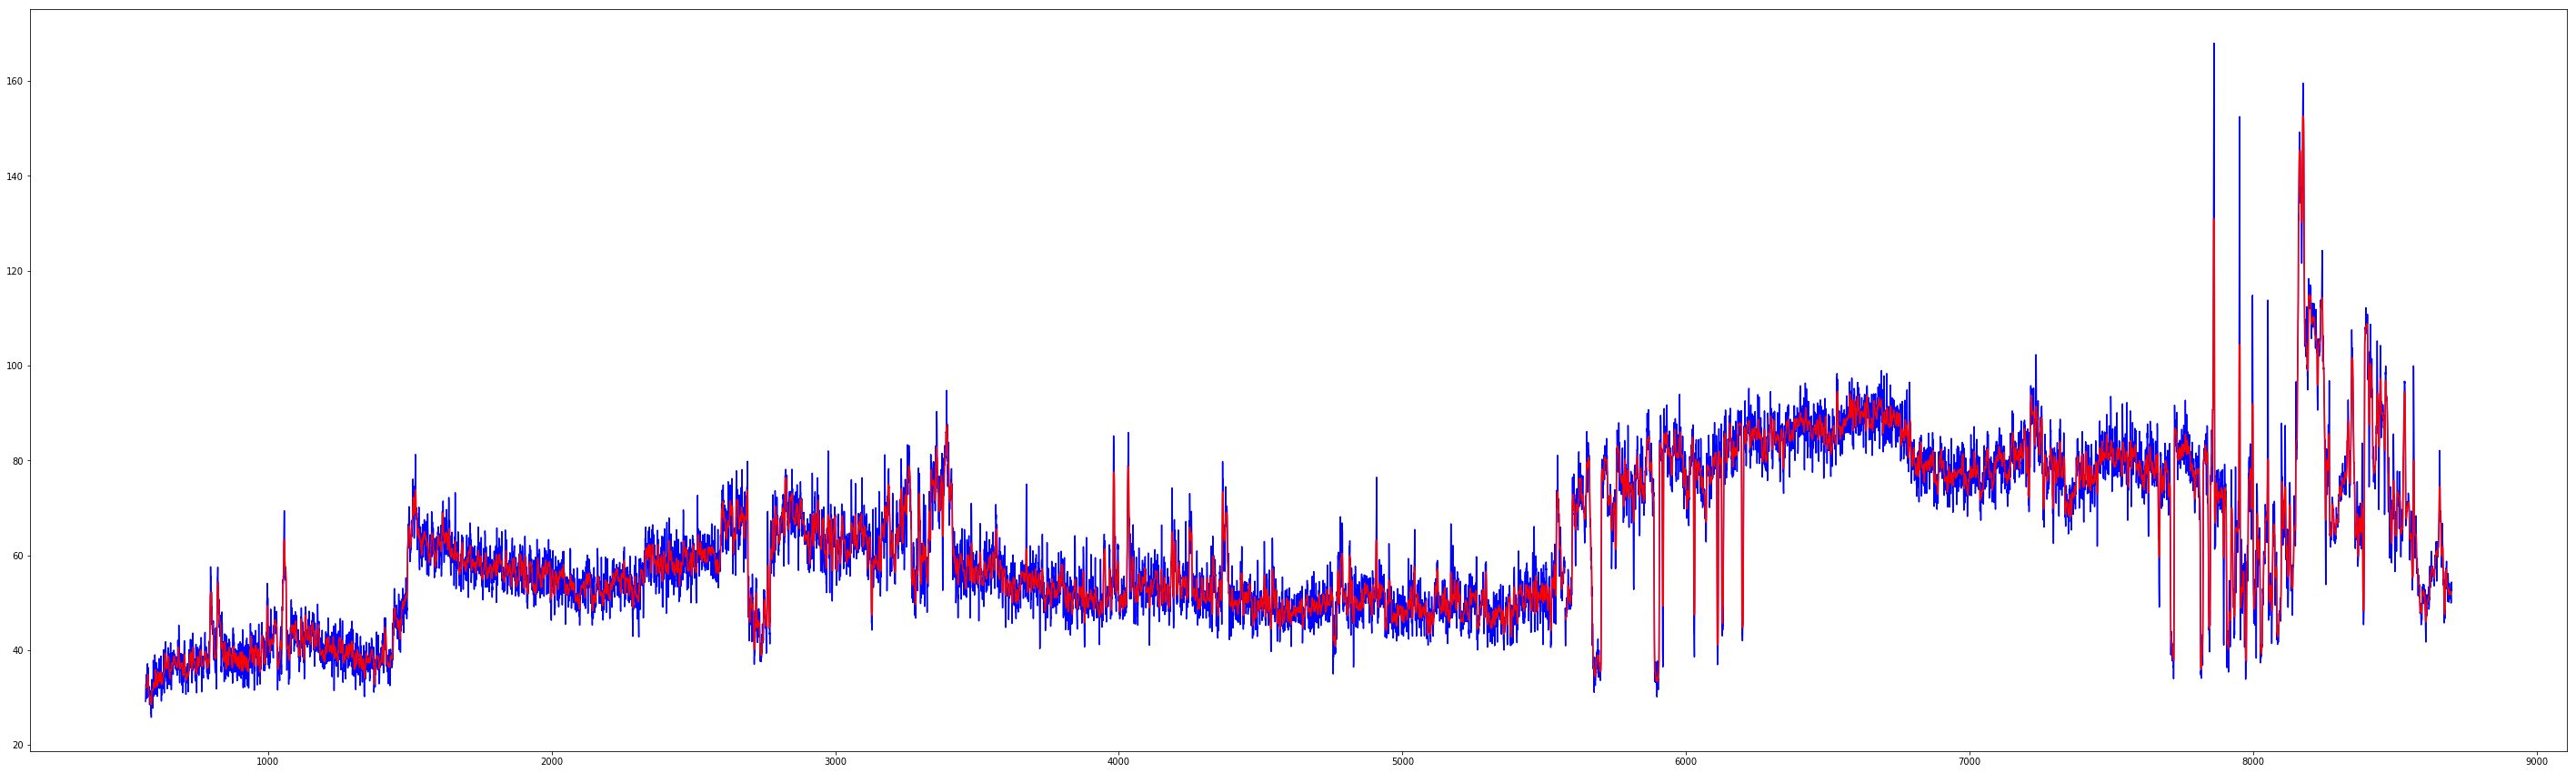

In [16]:
plt.figure(figsize=(50,15))
plt.plot(data['GR'],'-b')
plt.plot(data['GR'].rolling(window=10, center=True).median(),'-r')
plt.show()

Plot a subset of the logs to show more details.

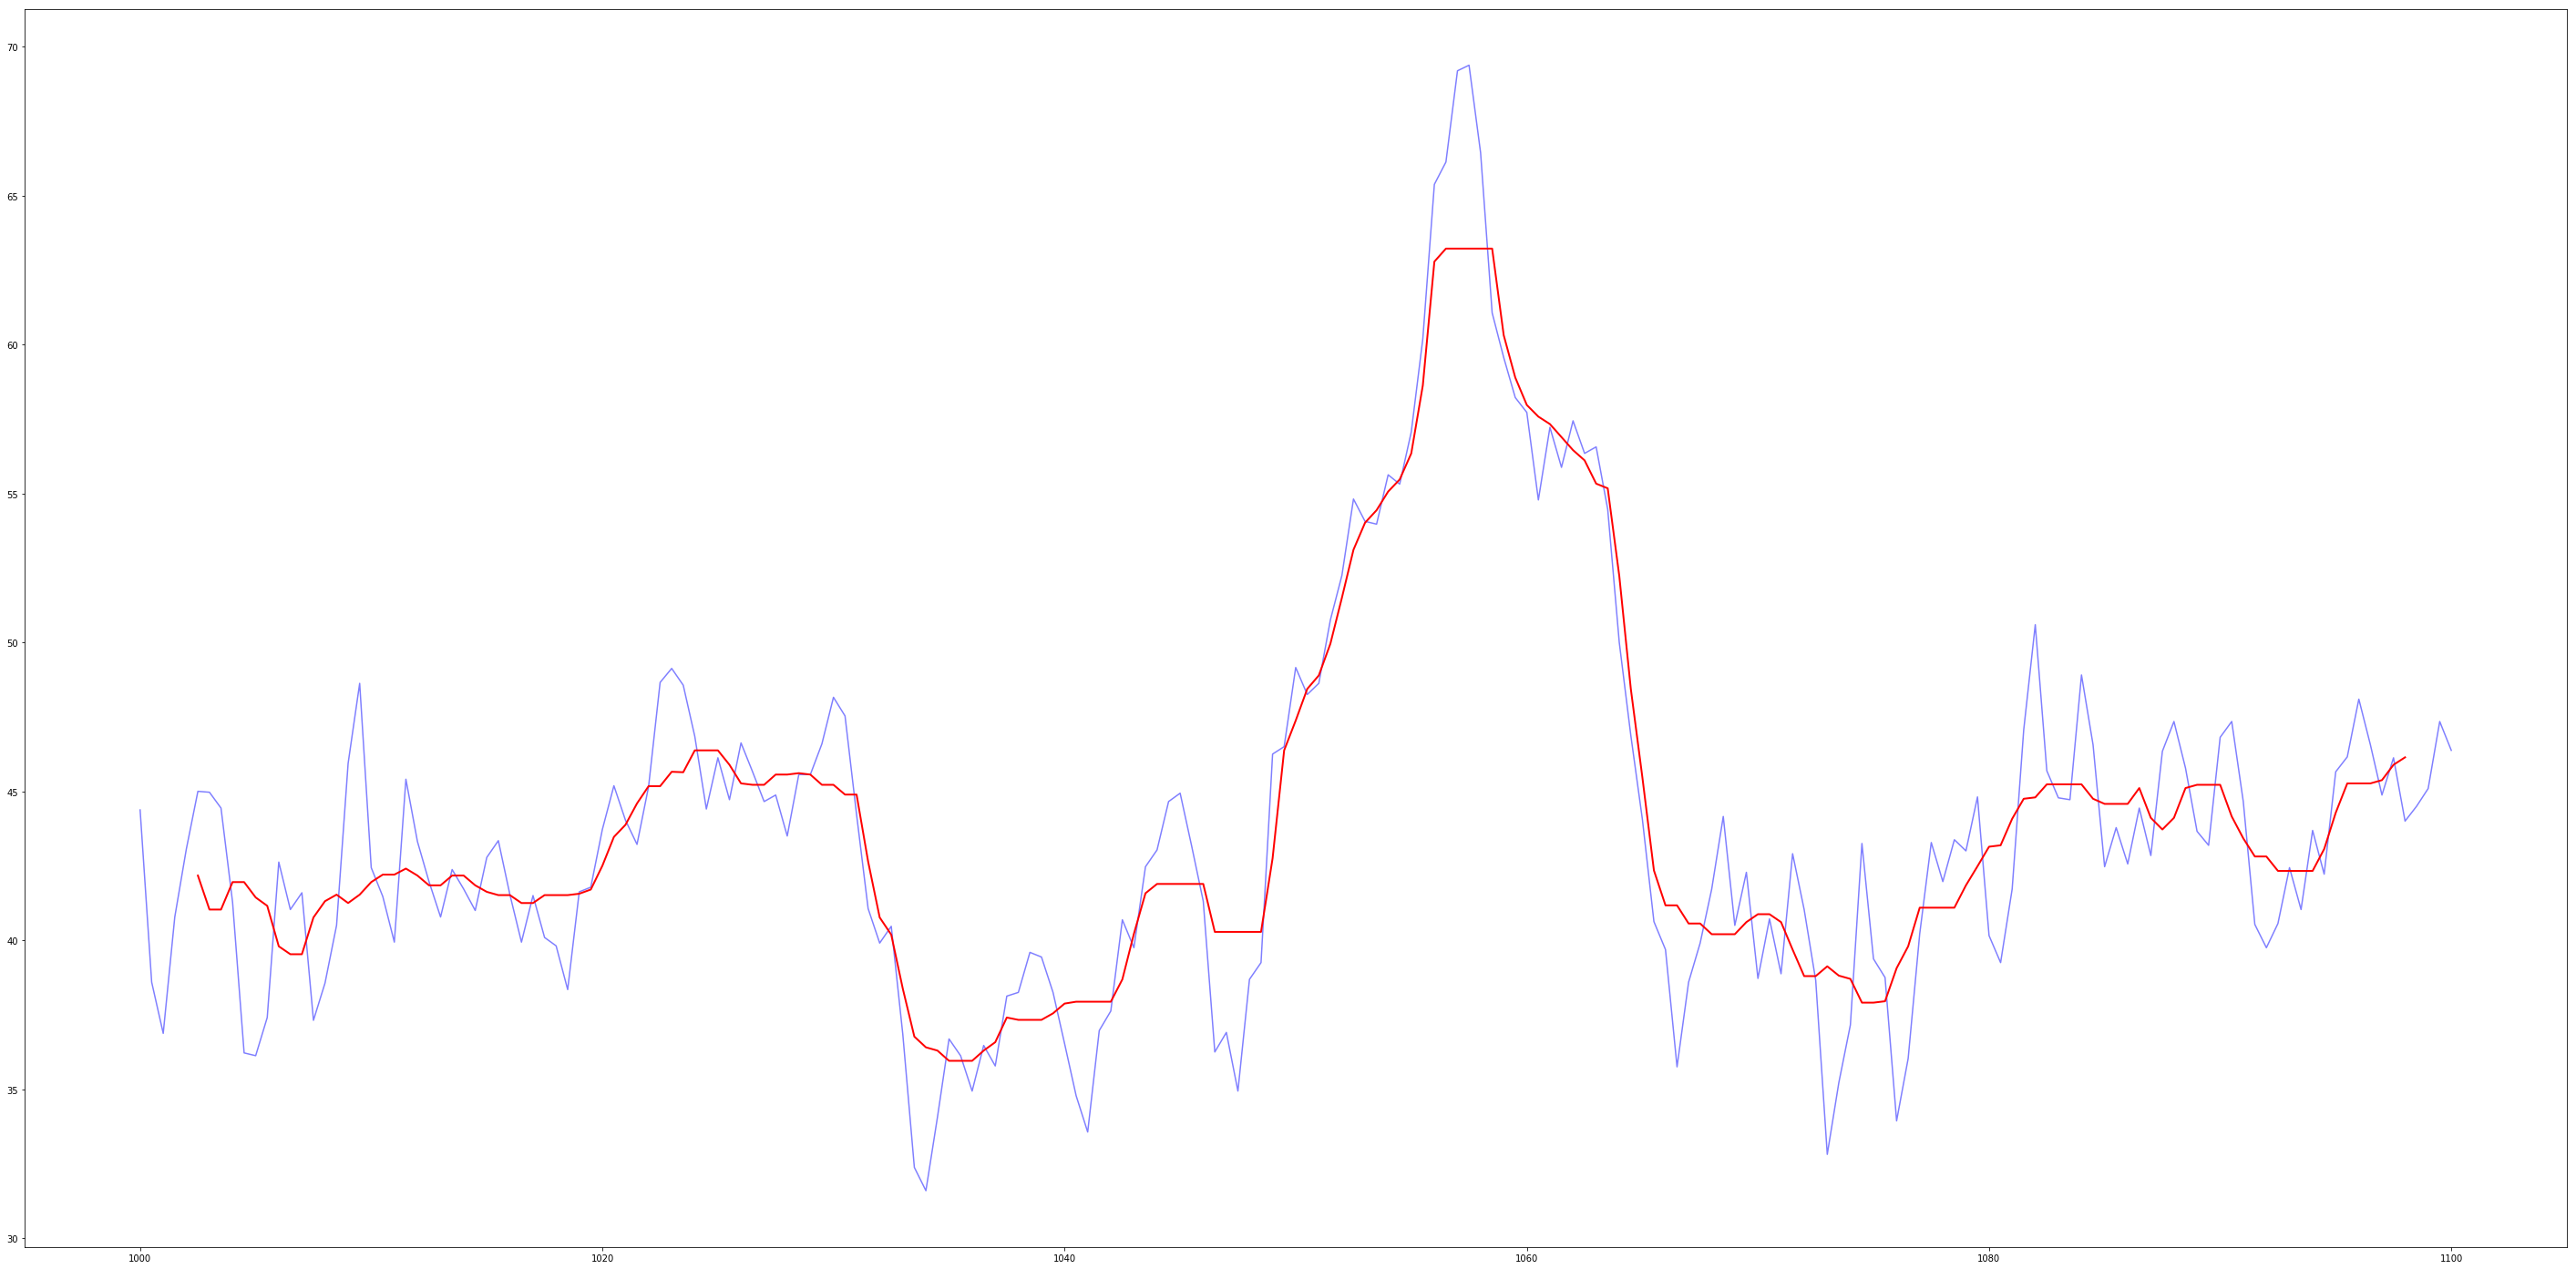

In [23]:
top_depth, base_depth = 1000, 1100
plt.figure(figsize=(50,25))
plt.plot(data['GR'][top_depth:base_depth],'-b', alpha=0.5)
plt.plot(data['GR'][top_depth:base_depth].rolling(window=10, center=True).median(),'-r', linewidth=2)
plt.show()

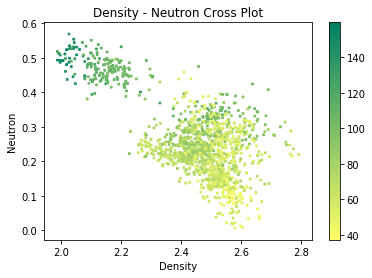

In [18]:
plt.scatter(data['DENS'], data['NEUT'], c=data['GR'], cmap='summer_r', s=5, marker = 'x')
plt.xlabel('Density')
plt.ylabel('Neutron')
plt.title('Density - Neutron Cross Plot')
plt.colorbar()
plt.show()

In [ ]:
las.